In [1]:
%pylab inline
import powerlaw
print(powerlaw.__version__)

import pylab
pylab.rcParams['xtick.major.pad']='8'
pylab.rcParams['ytick.major.pad']='8'
#pylab.rcParams['font.sans-serif']='Arial'

from matplotlib import rc
rc('font', family='sans-serif')
rc('font', size=10.0)
rc('text', usetex=False)

from matplotlib.font_manager import FontProperties
panel_label_font = FontProperties().copy()
panel_label_font.set_weight("bold")
panel_label_font.set_size(12.0)
panel_label_font.set_family("sans-serif")

Populating the interactive namespace from numpy and matplotlib
1.4.4


In [2]:
import networkx as nx
from collections import Counter
from scipy import stats
import pandas as pd
import matplotlib.lines as mlines

A = np.loadtxt('Data/arenas-pgp/out.arenas-pgp', dtype=int, usecols=range(2), comments="%")
G=nx.Graph()
for n in A:
    G.add_edge(n[0], n[1])

In [3]:
def average_degree(G):
    return 2 * G.number_of_edges() / G.number_of_nodes()

In [5]:
def moment(G,n):
    degree_per_node = nx.degree(G)

    val = 0
    for deg in degree_per_node:
         val += deg[1] ** n

    return val / float(nx.number_of_nodes(G))

In [6]:
#write in Gephi format
nx.write_gml(G, "output/pgp.gml", stringizer=str)

In [15]:
avg_deg = average_degree(G)
number_of_nodes = nx.number_of_nodes(G)
number_of_edges= nx.number_of_edges(G)
data = [d for n, d in G.degree()]
maxDegree = np.max(data)
minDegree = np.min(data)
print("Number of Nodes: " + str(number_of_nodes))
print("Number of Edges: " + str(number_of_edges))
print("avg degree: " + str(avg_deg))
print("max degree: " + str(maxDegree))
print("min degree: " + str(minDegree))
print("1st moment: " + str(moment(G, 1)))
print("2nd moment: " + str(moment(G, 2)))
print("3rd moment: " + str(moment(G, 3)))

Number of Nodes: 10680
Number of Edges: 24316
avg degree: 4.5535580524344565
max degree: 205
min degree: 1
1st moment: 4.5535580524344565
2nd moment: 85.97621722846442
3rd moment: 4462.983333333334


In [10]:
import collections
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

Text(0.5, 0, 'Degree')

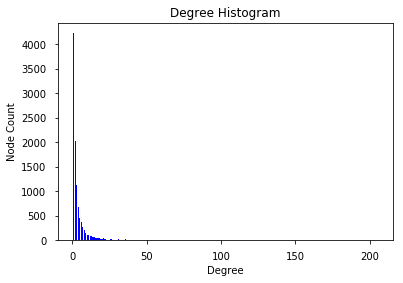

In [13]:
fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')
plt.title("Degree Histogram")
plt.ylabel("Node Count")
plt.xlabel("Degree")

Text(0.5, 0, 'rank')

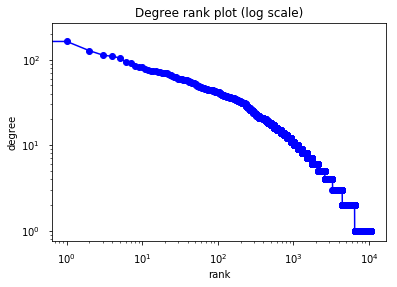

In [14]:
plt.loglog(degree_sequence,'b-',marker='o')
plt.title("Degree rank plot (log scale)")
plt.ylabel("degree")
plt.xlabel("rank")